<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_08_Seaborn%EC%8B%A4%EC%8A%B5_Iris%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.08. Seborn 실습 - 아이리스 데이터


---

* 날짜:
* 이름:


## 학습내용

    - distplot을 이용해 데이터 분포를 시각화 한다.
    - jointplot을 이용해 두 변수의 분포를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)
```

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x (150, 4)
y (150,)


#### | 데이터 기본 탐색


In [16]:
iris = pd.DataFrame(xs)
iris.columns = x_names  # 컬럼명 지정
iris['label'] = y
# iris.loc[iris['label'] == 0]['label'] = 'setosa'
# iris.loc[iris['label'] == 1]['label'] = 'versicolor'
# iris.loc[iris['label'] == 2]['label'] = 'virginica'
# iris

iris['label'] = [y_names[i] for i in y]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
sepal_size = iris.iloc[:,0] * iris.iloc[:,1] # 너비 x 길이 
sepal_size # 절반은 'small', 나머지 'big'
print('중앙값 : ', sepal_size.median())
# 중앙값보다 작으면 small 크면 big 어레이 만들기 
# new_sepsize = np.array(list(map(lambda x: 'big' if x > sepal_size.median() else 'small',sepal_size)))

# 중앙값보다 작으면 0 크면 1어레이 만들기
sepal_size = np.array(sepal_size>sepal_size.median(), dtype = 'int8')

# 중앙값보다 작으면 small 크면 big 어레이 만들기
sepal_size = [['small','big'][i] for i in sepal_size ]
iris['sepal_size'] = sepal_size


중앙값 :  17.66


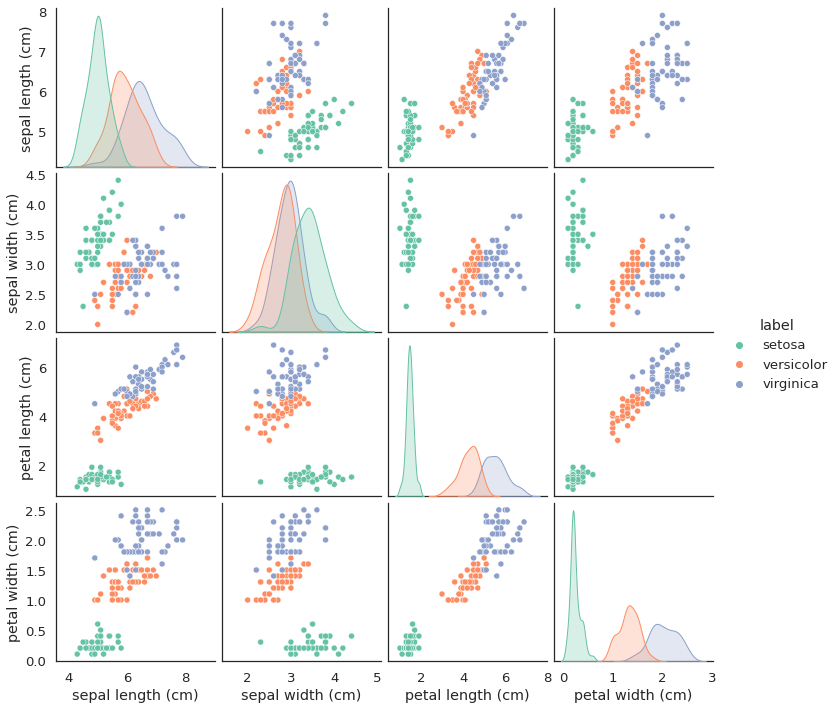

In [25]:
sns.pairplot(iris, hue = 'label')

### (2) Distributions plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.displot(data=None, x=None, y=None, 
                hue=None, hue_order=None, hue_norm=None, 
                row=None, col=None, 
                row_order=None, col_order=None,
                weights=None,
                kind='hist', # {“hist”, “kde”, “ecdf”}
                rug=False, rug_kws=None, 
                log_scale=None, 
                legend=True, 
                palette=None, color=None, col_wrap=None,  
                height=5, aspect=1)

```

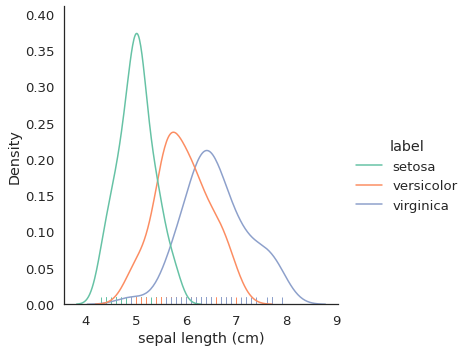

In [29]:
sns.displot(data = iris, x= x_names[0],
            kind = 'kde',
            hue = 'label',
            rug = True)

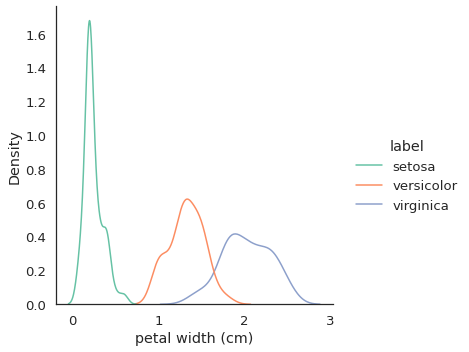

In [32]:
sns.displot(data = iris, x = x_names[-1], 
            hue = 'label', 
            kind = 'kde')

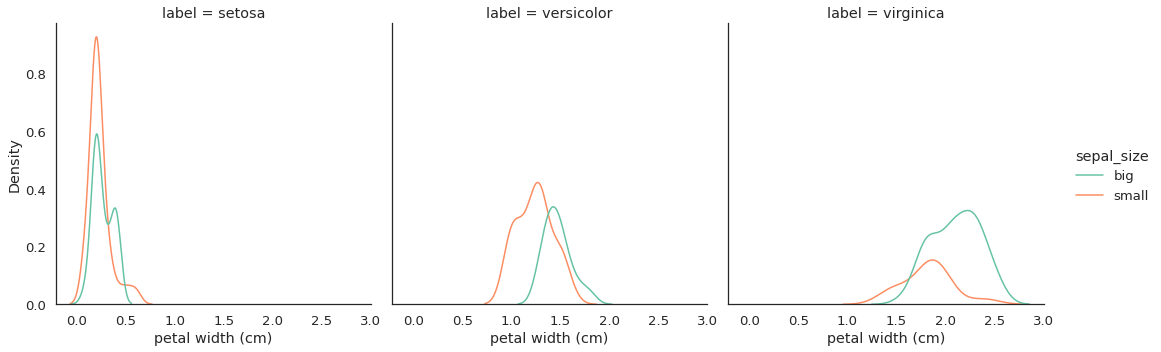

In [34]:
sns.displot(data = iris, x = x_names[-1], 
            hue = 'sepal_size', 
            kind = 'kde',
            col = 'label')

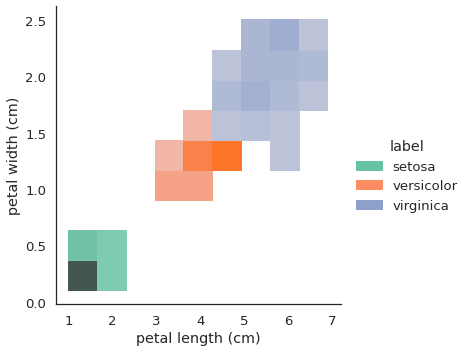

In [36]:
sns.displot(data = iris, x = x_names[2], y = x_names[3],
            hue = 'label') 
# 현재 이 그림은 히스토그램 

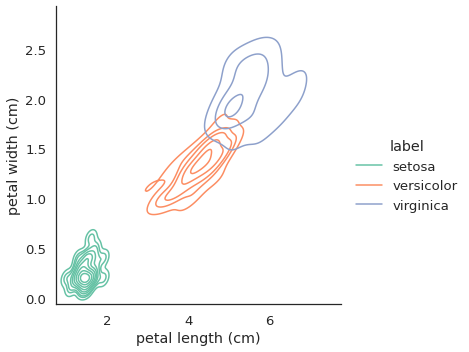

In [37]:
sns.displot(data = iris, x = x_names[2], y = x_names[3],
            hue = 'label',
            kind = 'kde') 

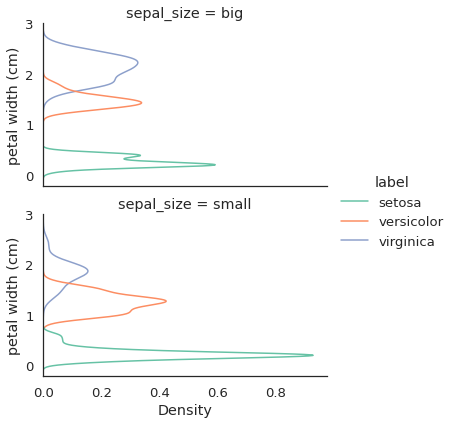

In [39]:
sns.displot(data = iris,  y = x_names[3],
            hue = 'label',
            kind = 'kde',
            row = 'sepal_size',
            height = 3,
            aspect = 1.6) 

### (3) Joint plot


```
seaborn.jointplot(x=None, y=None, data=None, 
                  hue=None,
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='scatter', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)
```

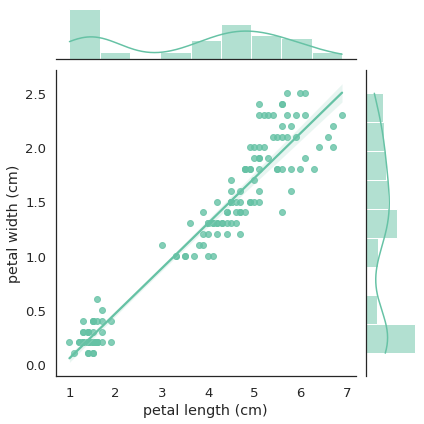

In [58]:
sns.jointplot(data = iris,  x = x_names[2], y = x_names[3],
              kind = 'reg')

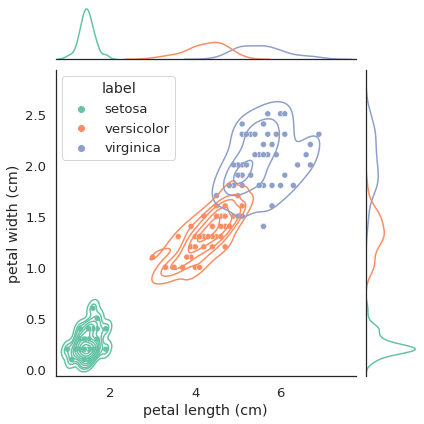

In [62]:
g = sns.jointplot(data = iris,  x = x_names[2], y = x_names[3],
              hue = 'label',
              kind = 'kde')

# 플롯에 산점도 추가 

g.plot_joint(sns.scatterplot)


## **과제: [penguin dataset : The new Iris](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://imgur.com/orZWHly.png)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('penguins')
```

In [68]:
df = sns.load_dataset('penguins')

#### | 데이터 기본 탐색


In [70]:
df.info()
print('species: ', df.species.unique())
print('island: ', df.island.unique())
print('sex: ', df.sex.unique())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
species:  ['Adelie' 'Chinstrap' 'Gentoo']
island:  ['Torgersen' 'Biscoe' 'Dream']
sex:  ['Male' 'Female' nan]


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [73]:
df_edited = df.dropna()
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
sns.pairplot(df_edited, hue = 'island') 
# Biscoe 섬 같은 경우 일부 구분이 잘 되는 편이다.
# 하지만 전체적으로 섬 간의 데이터 분포 구분이 명확하지 못해 섬 기준 분석은 좋은 선택이 아니다. 

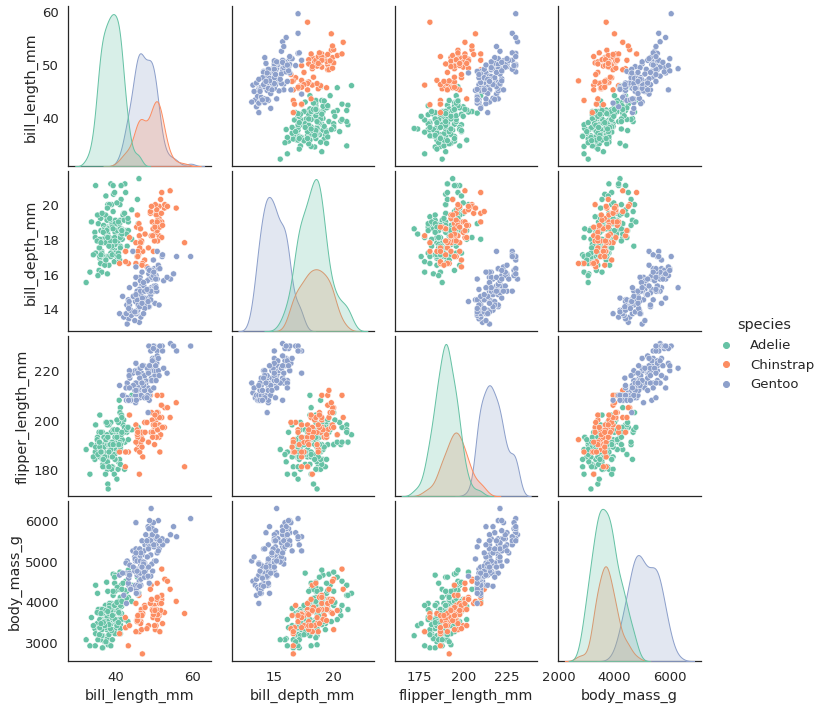

In [77]:
sns.pairplot(df_edited, hue = 'species')
# 전체적으로 species별 분포가 뚜렸하다.. 
# 변수에 따라서 Adelie와 Chinstrap의 분포가 겹치는 경우도 있지만 
# 겹치는 경우에도 각 specie별 분포의 응집성이 있어 
# 분석 기준으로 island 보다 적합해 보인다. 

In [ ]:
# 단일 변수의 경우, Chinstrap종은 다른 종들과 겹친다. 특히 Adelie종과 겹치는 편인데 유일하게 bill_length의 경우 Gentoo종의 분포와 겹친다. 

# bill_length와 다른 변수의 상관관계의 종별 차이가 가장 뚜렸해보인다. 


### (2) Distributions plot


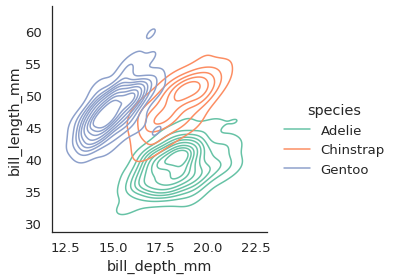

In [99]:
sns.displot(data = df_edited, x = 'bill_depth_mm', y = 'bill_length_mm', 
            hue = 'species',
            kind = 'kde',
            height = 4)

# 모든 종이 bill depth가 올라가면 bill length 또한 길어지는 추세를 보인다. 
# 하지만 Gentoo종이 다른종보다 bill depth 대비 부리길이가 더 긴 경향이 있다. 
# Adelie와 Chinstrap의 경우 bill depth 분포는 비슷하나 Chinstrap의 부리 길이가 더 길다는 것을 알 수 있다. 

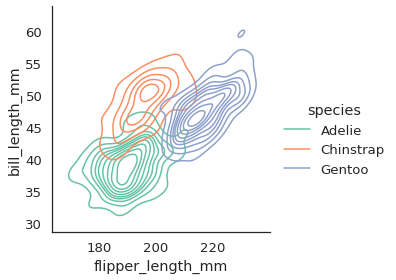

In [100]:
sns.displot(data = df_edited, x = 'flipper_length_mm', y = 'bill_length_mm', 
            hue = 'species',
            kind = 'kde',
            height = 4)
# 모든 종이 flipper length가 길어지면 bill length 또한 길어지는 추세를 보인다 (Adelie펭귄의 경우 이 경향성이 덜 뚜렷한 편이다.)
# Adelie종의 경우 부리 길이와 flipper 길이가 다른 종에 비해 짧은 편이다. 
# Chinstrap과 Gentoo의 부리길이 분포는 비슷하지만, filpper 사이즈는 Gentoo종이 더 길다. 
# 전체적으로 Gentoo종의 부리길이와 flipper 길이가 다른 종에 비해 긴편이다. 

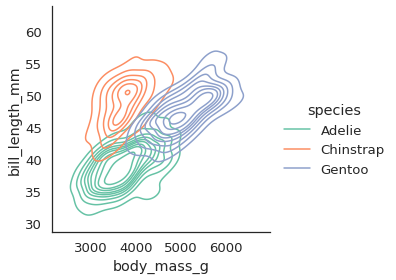

In [101]:
sns.displot(data = df_edited, x = 'body_mass_g', y = 'bill_length_mm', 
            hue = 'species',
            kind = 'kde',
            height = 4)
# 모든 종이 body mass가 늘어나면 bill length 또한 길어지는 추세를 보인다 
# Adelie종의 경우 부리 길이와 체중이 다른 종에 비해 짧은 편이다. 
# Chinstrap과 Gentoo의 부리길이 분포는 비슷하지만, Gentoo종의 체중이 더 나간다. 
# Chinstrap과 Adelie종의 체중분포는 서로 비슷하지만, Chinstrap종의 부리길이가 더 길다. 
 

### (3) Joint plot


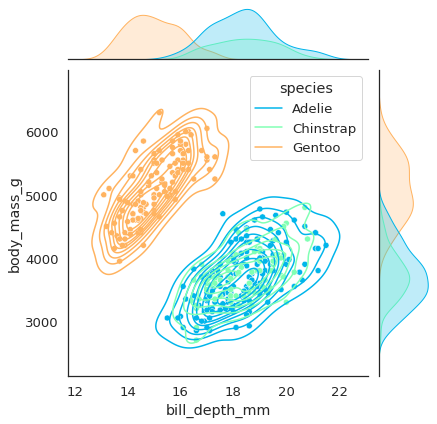

In [111]:
e  = sns.jointplot(data = df_edited, x = 'bill_depth_mm', y = 'body_mass_g',
              hue = 'species',
              palette = 'rainbow')
e.plot_joint(sns.kdeplot)

# 체중과 bill depth 를 변수로 두었을 경우 Adelie종과 Chinstrap종 분포가 거의 일치한다.
# Gentoo종의 분포가 다른 종들과 눈에띄게 떨어져 있는편인데, 
# bill depth가 짧은것에 비해 체중이 다른 종보다 훨씬 더 크다. 
# 모든 종이 bill depth가 증가하면 체중또한 증가하는 경향성을 보인다. 

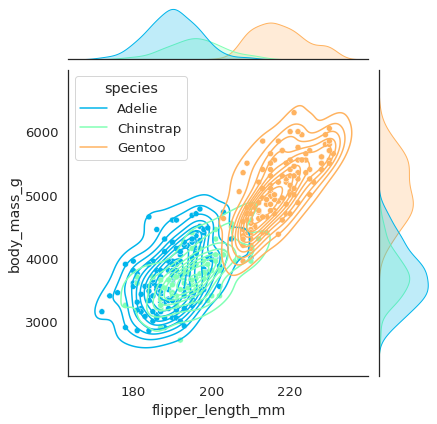

In [110]:
e  = sns.jointplot(data = df_edited, x = 'flipper_length_mm', y = 'body_mass_g',
              hue = 'species',
              palette = 'rainbow')
e.plot_joint(sns.kdeplot)

# 체중과 flipper 길이를 변수로 두었을 경우에도 Adelie종과 Chinstrap종 분포가 거의 일치한다.
# Gentoo종의 분포가 다른 종들에 비해 구분이 되는 편인데,
# flipper길이도 길고 그만큼 체중도 많이 나간다. 
# 모든 종이 flipper길이가 증가하면 체중또한 증가하는 경향성을 보인다. 

In [ ]:
# 결론 
# Gentoo: 다른 종보다 높은 체중, 긴 flipper, 작은 bill depth, 긴 bill length를 가지고있다. 
# Adelie: Chinstrap과 비슷한 체중, flipper 길이, bill depth, 짧은 bill length를 가지고있다. 
# Chinstrap: Adelie와 비슷한 채중, flipper 길이, bill dpeth,  긴 bill length를 가지고있다. 